# Enerji İstatistik Notu 60:  Türkiye Petrol Talebi Nerede Duracak?

### Barış Sanlı, barissanli.com
#### github.com/barissanli/ein

Bu not 60 numaralı enerji istatistik notunun kodlarını içermektedir. 18 Şubat 2025

Veri: https://www.energyinst.org/__data/assets/file/0003/1540551/merged_narrow.csv
İlgili dosyayı kod ile aynı dizinde narrow.csv olarak kaydedip, kodu çalıştırabilirsiniz

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
df=pd.read_csv("narrow.csv")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [51]:
orjinal.Var.unique()

array(['biodiesel_cons_kboed', 'biodiesel_cons_pj',
       'biodiesel_prod_kboed', 'biodiesel_prod_pj', 'biofuels_cons_ej',
       'biofuels_cons_kbd', 'biofuels_cons_kboed', 'biofuels_cons_pj',
       'biofuels_prod_kbd', 'biofuels_prod_kboed', 'biofuels_prod_pj',
       'biogeo_ej', 'biogeo_twh', 'biogeo_twh_net', 'co2_combust_mtco2',
       'co2_combust_pc', 'co2_combust_per_ej', 'co2_mtco2', 'coalcons_ej',
       'coalprod_ej', 'coalprod_mt', 'cobalt_kt', 'cobaltres_kt',
       'diesel_gasoil_cons_kbd', 'elect_twh', 'electbyfuel_coal',
       'electbyfuel_gas', 'electbyfuel_hydro', 'electbyfuel_nuclear',
       'electbyfuel_oil', 'electbyfuel_other', 'electbyfuel_ren_power',
       'electbyfuel_total', 'ethanol_cons_kboed', 'ethanol_cons_pj',
       'ethanol_prod_kboed', 'ethanol_prod_pj', 'fuel_oil_cons_kbd',
       'gascons_bcfd', 'gascons_bcm', 'gascons_ej', 'gasflared_bcm',
       'gasflared_mtco2', 'gasoline_cons_kbd', 'gasprod_bcfd',
       'gasprod_bcm', 'gasprod_ej', 'graph

In [57]:
orjinal=df.copy()
liste=["primary_ej","primary_eintensity","pop", "elect_twh","oilcons_ej","gascons_ej","coalcons_ej","hydro_ej","renewables_ej","oilcons_kbd"]
pc_list=["primary_ej","elect_twh","oilcons_ej","gascons_ej","coalcons_ej","hydro_ej","renewables_ej"]

In [58]:
df['Country_Year'] = df['Country'] + '_' + df['Year'].astype(str)

In [59]:
dfx=df.pivot(index='Country_Year', columns='Var', values='Value')
dfx=dfx.dropna(subset=['primary_ej'])
dfx=dfx[liste]

In [60]:
dfx["gdp"]=dfx.primary_ej/dfx.primary_eintensity
dfx["pc_gdp"]=1_000_000*dfx.gdp/dfx["pop"]

In [67]:
v=dfx.oilcons_ej/dfx.oilcons_kbd

In [69]:
v.describe()

count    5855.000000
mean        0.002070
std         0.000088
min         0.001474
25%         0.002026
50%         0.002077
75%         0.002125
max         0.002338
dtype: float64

In [74]:
pclist=[]
for col in pc_list:
    txt=f'pc_{col}'
    dfx[txt]=1000*dfx[col]/dfx["pop"]
    #print(txt)
    pclist.append(txt)

In [75]:
pclist2=pclist.copy()
pclist2.append("pop")
pclist2.append("pc_gdp")

In [76]:
#Sadece ülkeler
dfc=dfx[~dfx.index.str.startswith("Total")].copy()
#Sadece Bölgeler
dft=dfx[dfx.index.str.startswith("Total")].copy()

In [77]:
def split_index(row):
    country, year = row.name.split('_')
    row['Country'] = country
    row['Year'] = int(year)
    return row

# Apply the function to each row
dfx = dfx.apply(split_index, axis=1)

In [83]:
dfx

Var,primary_ej,primary_eintensity,pop,elect_twh,oilcons_ej,gascons_ej,coalcons_ej,hydro_ej,renewables_ej,oilcons_kbd,...,pc_gdp,pc_primary_ej,pc_elect_twh,pc_oilcons_ej,pc_gascons_ej,pc_coalcons_ej,pc_hydro_ej,pc_renewables_ej,Country,Year
Country_Year,,,,,,,,,,,,,,,,,,,,,
Algeria_1965,0.089398,1.249273,12.381256,NaN,0.055459,0.026750,0.002931,0.004258,NaN,26.716192,...,5779.676257,7.220393,NaN,4.479263,2.160508,0.236709,0.343912,NaN,Algeria,1965
Algeria_1966,0.107397,1.576958,12.613389,NaN,0.072982,0.027789,0.002847,0.003779,NaN,35.353233,...,5399.340064,8.514531,NaN,5.786053,2.203159,0.225714,0.299605,NaN,Algeria,1966
Algeria_1967,0.101691,1.365493,12.897116,NaN,0.068191,0.026958,0.002177,0.004365,NaN,33.285973,...,5774.293802,7.884760,NaN,5.287330,2.090211,0.168808,0.338410,NaN,Algeria,1967
Algeria_1968,0.109242,1.309902,13.190975,NaN,0.072602,0.028344,0.002303,0.005993,NaN,35.374426,...,6322.279202,8.281568,NaN,5.503936,2.148719,0.174569,0.454343,NaN,Algeria,1968
Algeria_1969,0.120741,1.324949,13.491016,NaN,0.076701,0.037266,0.002931,0.003843,NaN,37.714329,...,6754.781632,8.949740,NaN,5.685365,2.762288,0.217238,0.284849,NaN,Algeria,1969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam_2019,4.329488,4.748758,95.776716,236.886,1.200720,0.354348,2.090390,0.627417,0.056613,596.952853,...,9519.115759,45.203977,2473.315122,12.536663,3.699730,21.825657,6.550834,0.591093,Vietnam,2019
Vietnam_2020,4.335817,4.625592,96.648685,244.005,1.018666,0.318218,2.195068,0.688931,0.114933,507.441874,...,9698.569058,44.861620,2524.659285,10.539880,3.292527,22.711826,7.128202,1.189184,Vietnam,2020
Vietnam_2021,4.350794,4.538155,97.468028,253.616,0.983800,0.259160,2.085238,0.741103,0.281493,492.869794,...,9836.192073,44.638165,2602.043000,10.093562,2.658927,21.394074,7.603545,2.888056,Vietnam,2021


In [84]:
dfx.loc["Turkiye_2023","pc_oilcons_ej"]

26.81090384811847

In [12]:
dfx_pct=dfx.groupby('Country').pct_change()

In [13]:
dfx_pct.columns = [f"{col}_pct_change" for col in dfx_pct.columns]


In [14]:
merged_df = pd.merge(dfx, dfx_pct, left_index=True, right_index=True)

In [15]:
merged_df.columns

Index(['primary_ej', 'primary_eintensity', 'pop', 'elect_twh', 'oilcons_ej',
       'gascons_ej', 'coalcons_ej', 'hydro_ej', 'renewables_ej', 'gdp',
       'pc_gdp', 'pc_primary_ej', 'pc_elect_twh', 'pc_oilcons_ej',
       'pc_gascons_ej', 'pc_coalcons_ej', 'pc_hydro_ej', 'pc_renewables_ej',
       'Country', 'Year', 'primary_ej_pct_change',
       'primary_eintensity_pct_change', 'pop_pct_change',
       'elect_twh_pct_change', 'oilcons_ej_pct_change',
       'gascons_ej_pct_change', 'coalcons_ej_pct_change',
       'hydro_ej_pct_change', 'renewables_ej_pct_change', 'gdp_pct_change',
       'pc_gdp_pct_change', 'pc_primary_ej_pct_change',
       'pc_elect_twh_pct_change', 'pc_oilcons_ej_pct_change',
       'pc_gascons_ej_pct_change', 'pc_coalcons_ej_pct_change',
       'pc_hydro_ej_pct_change', 'pc_renewables_ej_pct_change',
       'Year_pct_change'],
      dtype='object')

In [21]:
yakit="pc_oilcons_ej"

In [22]:
dfmc = merged_df.dropna(subset=['primary_ej',yakit])

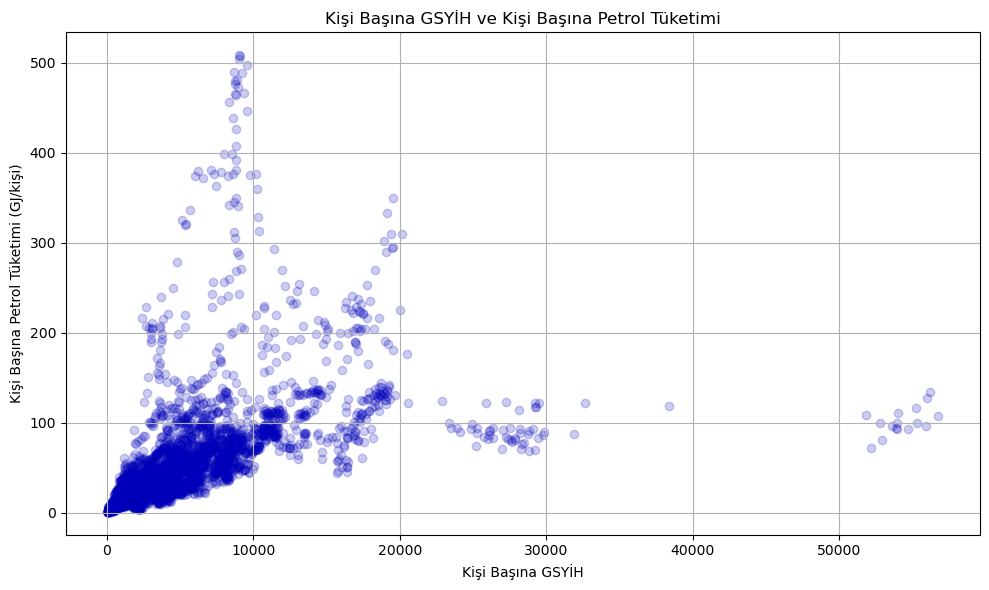

In [123]:
#dfmc[['pc_gdp','pc_elect_twh']]
# Scatter plot
xeksen="pc_gascons_ej"
xeksen="pc_elect_twh"

plt.figure(figsize=(10, 6))

plt.scatter(dfmc[xeksen], dfmc[yakit], marker='o', color='#0000BA',alpha=0.2)

plt.xlabel('Kişi Başına GSYİH')
plt.ylabel('Kişi Başına Petrol Tüketimi (GJ/kişi)')
plt.title('Kişi Başına GSYİH ve Kişi Başına Petrol Tüketimi')
plt.grid(True)
#plt.xlim(0, 100)
#plt.ylim(0, 220)
plt.tight_layout()
plt.show()

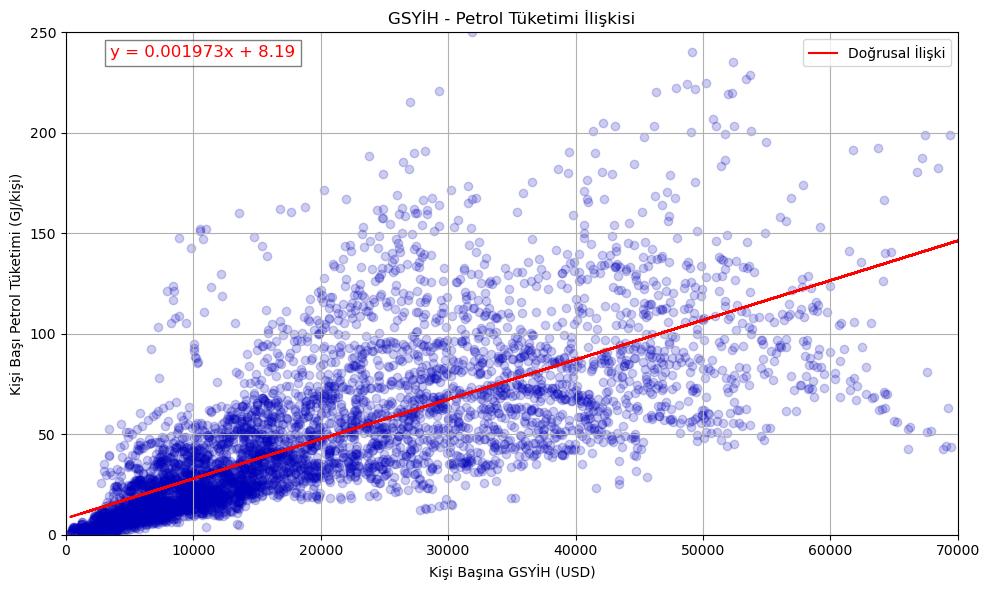

In [124]:
# Scatter plot
plt.figure(figsize=(10, 6))

# Filter data within visible limits
visible_data = dfmc[(dfmc['pc_gdp'] <= 70000) & (dfmc[yakit] <= 250)]

plt.scatter(dfmc['pc_gdp'], dfmc[yakit], marker='o', color='#0000BA', alpha=0.2)

# Calculate regression line for visible data
m, b = np.polyfit(visible_data['pc_gdp'], visible_data[yakit], 1)
plt.plot(dfmc['pc_gdp'], m * dfmc['pc_gdp'] + b, color='red', label='Doğrusal İlişki')

# Annotate regression formula
formula = f'y = {m:.6f}x + {b:.2f}'
plt.annotate(formula, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red',
             bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Kişi Başına GSYİH (USD)')
plt.ylabel('Kişi Başı Petrol Tüketimi (GJ/kişi)')
plt.title('GSYİH - Petrol Tüketimi İlişkisi')
plt.grid(True)
plt.xlim(0, 70000)
plt.ylim(0, 250)
plt.legend()
plt.tight_layout()
plt.show()

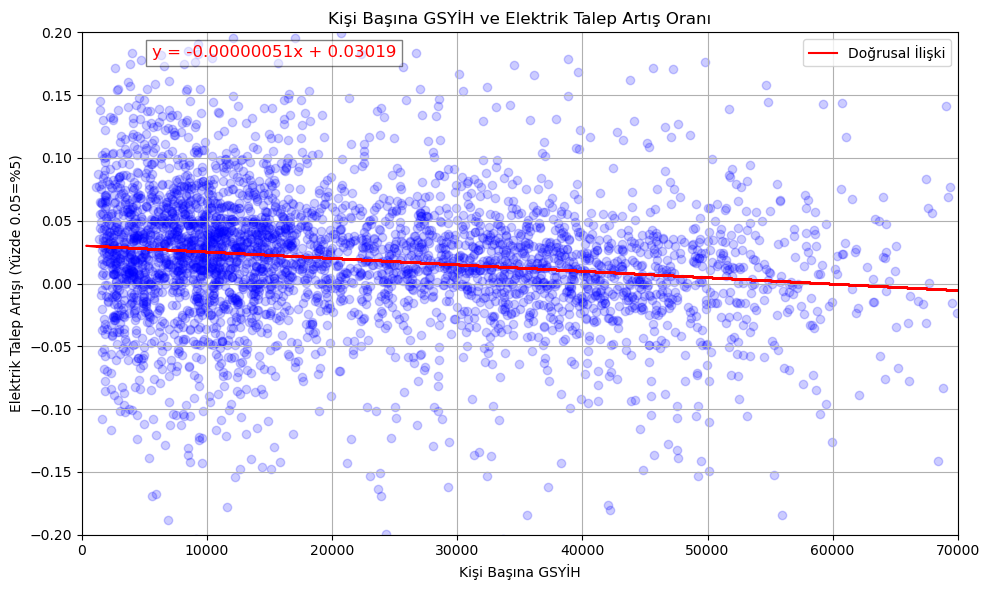

In [125]:
# Scatter plot
param2='pc_elect_twh_pct_change'
altlimit=-0.2
ustlimit=0.2

plt.figure(figsize=(10, 6))

# Filter data within visible limits
visible_data = dfmc[(dfmc['pc_gdp'] <= 70000) & (dfmc[param2] <= ustlimit)
 & (dfmc[param2] >= altlimit)]

plt.scatter(dfmc['pc_gdp'], dfmc[param2], marker='o', color='b', alpha=0.2)

# Calculate regression line for visible data
m, b = np.polyfit(visible_data['pc_gdp'], visible_data[param2], 1)
plt.plot(dfmc['pc_gdp'], m * dfmc['pc_gdp'] + b, color='red', label='Doğrusal İlişki')

# Annotate regression formula
formula = f'y = {m:.8f}x + {b:.5f}'
plt.annotate(formula, xy=(0.08, 0.95), xycoords='axes fraction', fontsize=12, color='red',
             bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Kişi Başına GSYİH')
plt.ylabel('Elektrik Talep Artışı (Yüzde 0.05=%5)')
plt.title('Kişi Başına GSYİH ve Elektrik Talep Artış Oranı')
plt.grid(True)
plt.xlim(0, 70000)
plt.ylim(altlimit,ustlimit)
plt.legend()
plt.tight_layout()
plt.show()

In [126]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Define features and target
X = dfmc[['pc_gdp','pop']]
y = dfmc[yakit]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialize and train the Random Forest regressor
rf = RandomForestRegressor(n_estimators=500, random_state=5)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 536.7096466682923
R^2 Score: 0.8322378675301935


In [127]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Assuming your merged_df looks like this:
# Columns: 'Country', 'Year', 'pc_pe', 'pc_gdp', 'pop'

# Define your dependent and independent variables
y = dfmc[yakit]
X = dfmc[['pc_gdp', 'pop']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of candidate models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'SVR': SVR()
}

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print model performance
    print(f'{name}:')
    print(f'  Mean Squared Error (MSE): {mse:.4f}')
    print(f'  R-squared (R2 Score): {r2:.4f}')
    print()

# Compare performance and choose the best model based on R2 score and MSE


Linear Regression:
  Mean Squared Error (MSE): 3002.1776
  R-squared (R2 Score): 0.0161

Decision Tree Regressor:
  Mean Squared Error (MSE): 741.7658
  R-squared (R2 Score): 0.7569

Random Forest Regressor:
  Mean Squared Error (MSE): 496.9119
  R-squared (R2 Score): 0.8371

Gradient Boosting Regressor:
  Mean Squared Error (MSE): 813.7417
  R-squared (R2 Score): 0.7333

SVR:
  Mean Squared Error (MSE): 3339.2672
  R-squared (R2 Score): -0.0944



Random Forest Regressor - MSE: 585.8128, R2 Score: 0.8231


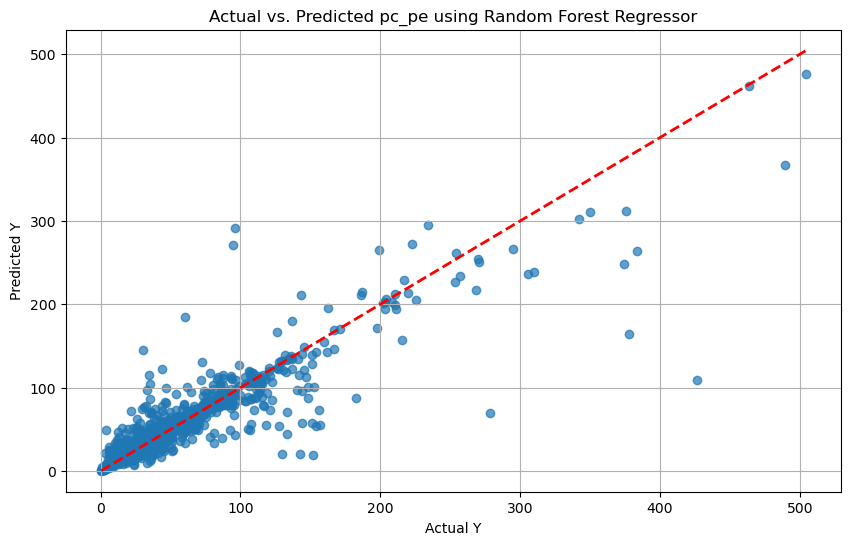

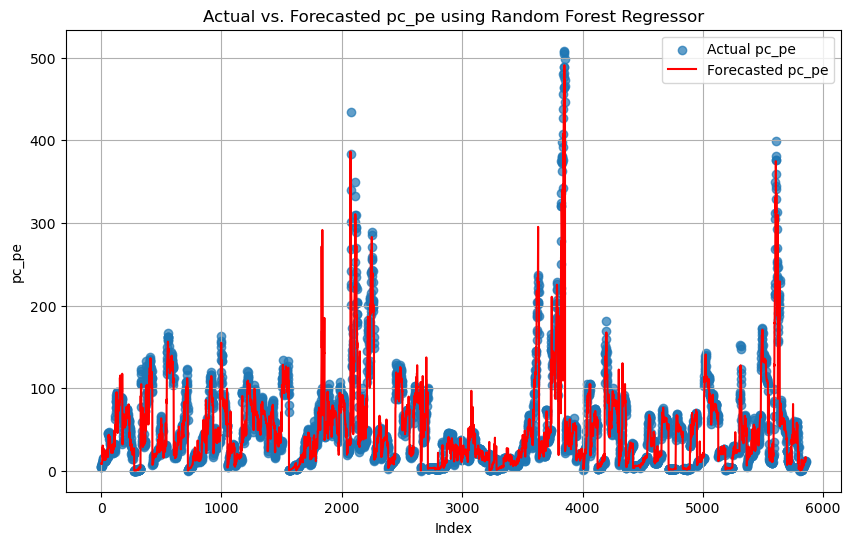

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your merged_df looks like this:
# Columns: 'Country', 'Year', 'pc_pe', 'pc_gdp', 'pop'

# Define your dependent and independent variables
y = dfmc[yakit]
X = dfmc[['pc_gdp', 'pop']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=4)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regressor - MSE: {mse:.4f}, R2 Score: {r2:.4f}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted pc_pe using Random Forest Regressor')
plt.grid(True)
plt.show()

# Making forecasts based on the entire merged_df
y_forecast = rf_model.predict(X)

# Plot the forecasted values against actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, label='Actual pc_pe', alpha=0.7)
plt.plot(range(len(y_forecast)), y_forecast, color='red', label='Forecasted pc_pe')
plt.xlabel('Index')
plt.ylabel('pc_pe')
plt.title('Actual vs. Forecasted pc_pe using Random Forest Regressor')
plt.legend()
plt.grid(True)
plt.show()


In [129]:
# Define new data for prediction
new_data = pd.DataFrame({
    'pc_gdp': [33755.9],
    'pop': [85.816]
})

# Predicting using the trained model
forecast = rf_model.predict(new_data)

# Print forecasted value
print("Forecasted pc_primary_ej:", forecast[0]*85/1000)

Forecasted pc_primary_ej: 2.5304124065874585


In [130]:
dfmc[(dfmc.Country=='Turkiye') & (dfmc.Year==2023)][["pc_gdp","pop","oilcons_ej"]]

,pc_gdp,pop,oilcons_ej
Country_Year,,,
Turkiye_2023,33755.909231,85.816199,2.30081


In [131]:
#dfmc.describe()

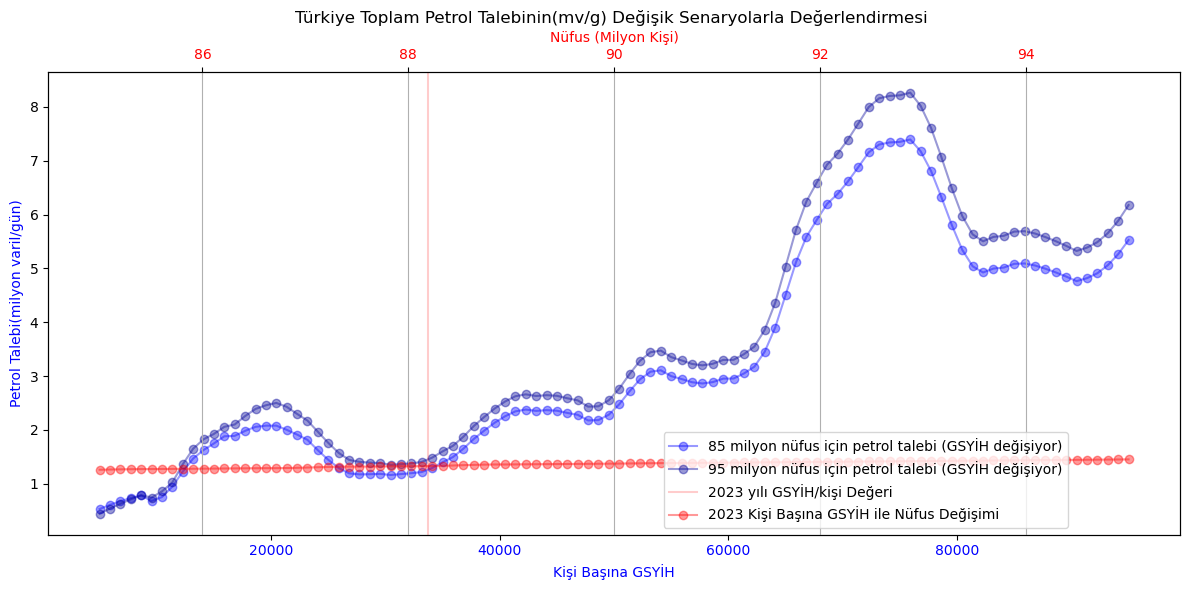

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

# Generate a range of pc_gdp and pop values
pc_gdp_range = np.linspace(5000, 95000, 100)
pop_range = np.linspace(85, 95, 100)

# Create DataFrames for the pc_gdp and pop ranges
data_gdp = pd.DataFrame({'pc_gdp': pc_gdp_range, 'pop': 85})  # 85 milyon için sabit
data_pop = pd.DataFrame({'pc_gdp': 33755, 'pop': pop_range})  # Fixed pc_gdp
data_gp  = pd.DataFrame({'pc_gdp': pc_gdp_range, 'pop': 95})  # 95 milyon için sabit
# Predict pc_elect_twh using the trained Random Forest Regressor
data_gdp[yakit] = rf_model.predict(data_gdp[['pc_gdp', 'pop']])
data_pop[yakit] = rf_model.predict(data_pop[['pc_gdp', 'pop']])
data_gp[yakit] = rf_model.predict(data_gp[['pc_gdp', 'pop']])

ej_to_mbd=2

# Calculate pc_elect_twh * pop
data_gdp[yakit] = data_gdp[yakit] * data_gdp['pop']/(1000*ej_to_mbd)
data_pop[yakit] = data_pop[yakit] * data_pop['pop']/(1000*ej_to_mbd)
data_gp[yakit] = data_gp[yakit] * data_gp['pop']/(1000*ej_to_mbd)


# Smooth the outputs using Savitzky-Golay filter
smoothed_gdp = savgol_filter(data_gdp[yakit], window_length=9, polyorder=2)
smoothed_pop = savgol_filter(data_pop[yakit], window_length=9, polyorder=2)
smoothed_gp = savgol_filter(data_gp[yakit], window_length=9, polyorder=2)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot pc_gdp vs. smoothed pc_elect_twh * pop
ax1.plot(data_gdp['pc_gdp'], smoothed_gdp, 'bo-', label='85 milyon nüfus için petrol talebi (GSYİH değişiyor)',alpha=0.4)
ax1.set_xlabel('Kişi Başına GSYİH', color='blue')
ax1.set_ylabel('Petrol Talebi(milyon varil/gün)', color='blue')
ax1.tick_params(axis='x', labelcolor='blue')

ax1.plot(data_gp['pc_gdp'], smoothed_gp, 'o-', label='95 milyon nüfus için petrol talebi (GSYİH değişiyor)', color='#000099',alpha=0.4)

# Add vertical red line
ax1.axvline(x=33755, color='red', linestyle='-', label='2023 yılı GSYİH/kişi Değeri',alpha=0.2)

# Create a second x-axis and plot pop vs. smoothed pc_elect_twh * pop
ax2 = ax1.twiny()
ax2.plot(data_pop['pop'], smoothed_pop, 'ro-', label='2023 Kişi Başına GSYİH ile Nüfus Değişimi',alpha=0.4)
ax2.set_xlabel('Nüfus (Milyon Kişi)', color='red')
ax2.tick_params(axis='x', labelcolor='red')

# Set the title and grid
plt.title('Türkiye Toplam Petrol Talebinin(mv/g) Değişik Senaryolarla Değerlendirmesi ')
fig.tight_layout()
fig.legend(loc='lower right', bbox_to_anchor=(0.9, 0.1), ncol=1)
plt.grid(True)
plt.show()


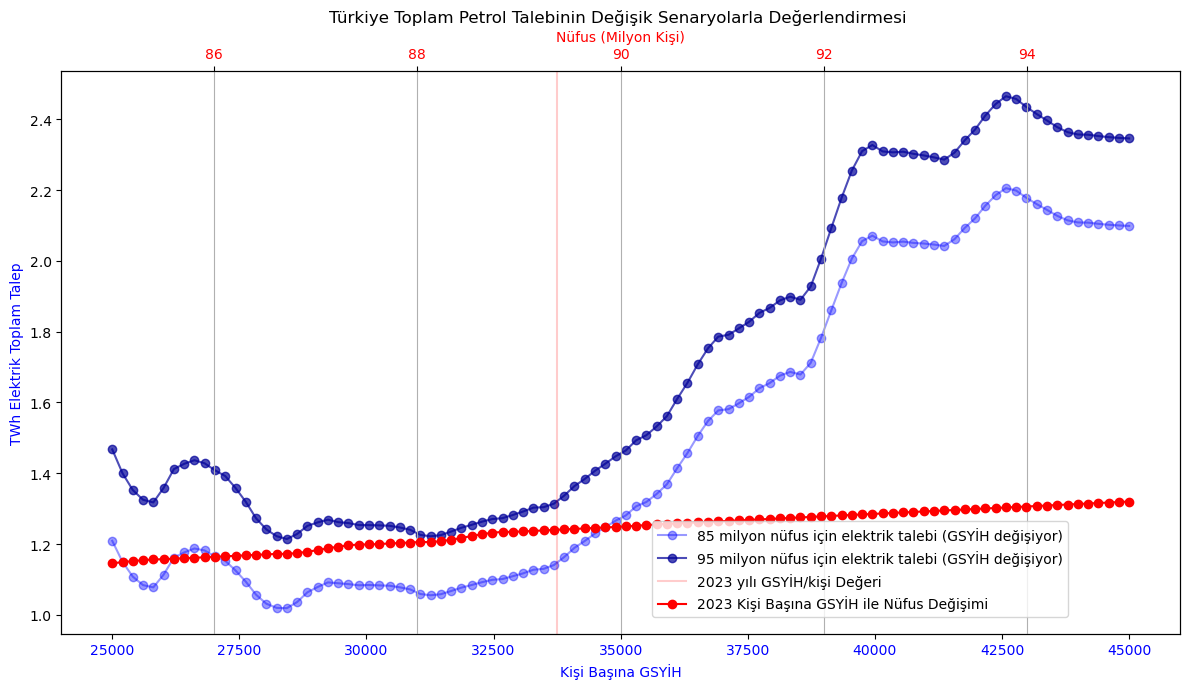

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

# Generate a range of pc_gdp and pop values
pc_gdp_range = np.linspace(25000, 45000, 100)
pop_range = np.linspace(85, 95, 100)

# Create DataFrames for the pc_gdp and pop ranges
data_gdp = pd.DataFrame({'pc_gdp': pc_gdp_range, 'pop': 85})  # 85 milyon için sabit
data_pop = pd.DataFrame({'pc_gdp': 33755, 'pop': pop_range})  # Fixed pc_gdp
data_gp  = pd.DataFrame({'pc_gdp': pc_gdp_range, 'pop': 95})  # 95 milyon için sabit
# Predict pc_elect_twh using the trained Random Forest Regressor
data_gdp[yakit] = rf_model.predict(data_gdp[['pc_gdp', 'pop']])
data_pop[yakit] = rf_model.predict(data_pop[['pc_gdp', 'pop']])
data_gp[yakit] = rf_model.predict(data_gp[['pc_gdp', 'pop']])

ej_to_mbd=2.2

# Calculate pc_elect_twh * pop
data_gdp[yakit] = data_gdp[yakit] * data_gdp['pop']/(1000*ej_to_mbd)
data_pop[yakit] = data_pop[yakit] * data_pop['pop']/(1000*ej_to_mbd)
data_gp[yakit] = data_gp[yakit] * data_gp['pop']/(1000*ej_to_mbd)


# Smooth the outputs using Savitzky-Golay filter
smoothed_gdp = savgol_filter(data_gdp[yakit], window_length=9, polyorder=2)
smoothed_pop = savgol_filter(data_pop[yakit], window_length=9, polyorder=2)
smoothed_gp = savgol_filter(data_gp[yakit], window_length=9, polyorder=2)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot pc_gdp vs. smoothed pc_elect_twh * pop
ax1.plot(data_gdp['pc_gdp'], smoothed_gdp, 'bo-', label='85 milyon nüfus için elektrik talebi (GSYİH değişiyor)',alpha=0.4)
ax1.set_xlabel('Kişi Başına GSYİH', color='blue')
ax1.set_ylabel('TWh Elektrik Toplam Talep', color='blue')
ax1.tick_params(axis='x', labelcolor='blue')

ax1.plot(data_gp['pc_gdp'], smoothed_gp, 'o-', label='95 milyon nüfus için elektrik talebi (GSYİH değişiyor)', color='#000099',alpha=0.7)

# Add vertical red line
ax1.axvline(x=33755, color='red', linestyle='-', label='2023 yılı GSYİH/kişi Değeri',alpha=0.2)

# Create a second x-axis and plot pop vs. smoothed pc_elect_twh * pop
ax2 = ax1.twiny()
ax2.plot(data_pop['pop'], smoothed_pop, 'ro-', label='2023 Kişi Başına GSYİH ile Nüfus Değişimi')
ax2.set_xlabel('Nüfus (Milyon Kişi)', color='red')
ax2.tick_params(axis='x', labelcolor='red')

# Set the title and grid
plt.title('Türkiye Toplam Petrol Talebinin Değişik Senaryolarla Değerlendirmesi ')
fig.tight_layout()
fig.legend(loc='lower right', bbox_to_anchor=(0.9, 0.1), ncol=1)
plt.grid(True)
plt.show()
